Filtering and Visualization
============================

* Line and scatter plots using Matplotlib
* Working with longer time records
* Filtering global monthly data


CWK: Plot the temperature and precipitation for New York, Philadelphia, Newark and Boston from 1900-2015. You should create the following graphs:
* temperature line plot, with a labeled line for each city
* precipitation line plot, with a labeled line for each city
* temperate vs. scatter plot

Then pick 2 months from different seasons (for example December and  April) and redo 1-3 for just those months

Submit these graphs and a paragraph describing whether the patterns discussed in the first assignment still appear in the longer time record, and if those patterns still appear when the data is sampled by month , with references back to the graphs to support your assertions. 

In [2]:
#lets start with yesterday's data, aggregated into city averages:

import pandas as pd
import numpy as np

data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\571549.csv"
df = pd.read_csv(data_path)

nyc_inds = [sn.endswith("NY US") for sn in df['STATION_NAME']]
nyc = df[nyc_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    nyc[dk][nyc[dk]==-9999]= np.nan

nyc_agg = nyc.groupby('DATE').mean()
print nyc_agg


          ELEVATION   LATITUDE  LONGITUDE        EMXP        MXSD  \
DATE                                                                
20150101  34.069231  40.789296 -73.825647  461.000000  240.300000   
20150201  34.069231  40.789296 -73.825647  263.538462  255.666667   
20150301  34.069231  40.789296 -73.825647  248.000000  246.000000   
20150401  34.069231  40.789296 -73.825647  289.769231    0.000000   
20150501  34.069231  40.789296 -73.825647  165.923077    0.000000   
20150601  33.571429  40.784668 -73.803001  366.500000    0.000000   

                 TPCP        TSNW        EMXT        EMNT        MMXT  \
DATE                                                                    
20150101  1258.230769  351.090909  144.500000 -137.833333   20.666667   
20150201   497.692308  217.090909   54.666667 -172.500000   -6.666667   
20150301  1159.000000  317.000000  152.000000 -118.666667   66.666667   
20150401   487.307692    0.000000  256.500000   -4.333333  158.000000   
20150501 

C:\Users\story645\Anaconda\lib\site-packages\pandas\core\series.py:632: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self.where(~key, value, inplace=True)


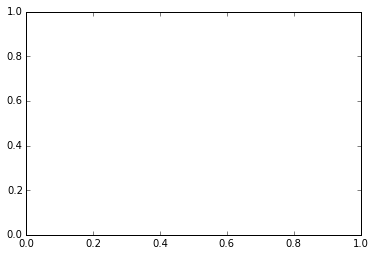

In [8]:
#lets look at the change in temperature over time

%matplotlib inline 
#embeds the graph in the notebook

import matplotlib.pyplot as plt

fig = plt.figure() # creates empty canvas 
ax = fig.add_subplot(1,1,1) # creates an x/y axis on the canvas 

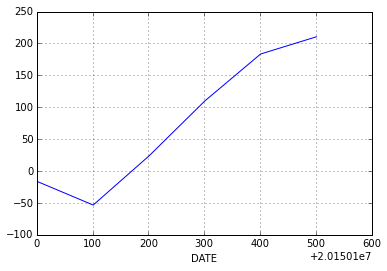

In [10]:
#lets grab the average temperature MNTM and put it on the fig
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)


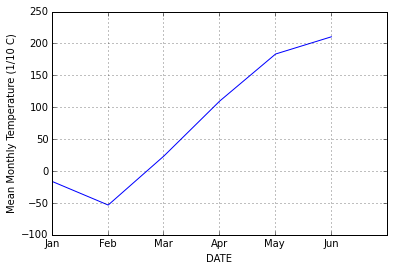

In [24]:
#but wait, labels?
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (1/10 C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])

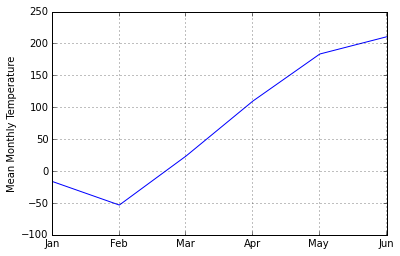

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (1/10 C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

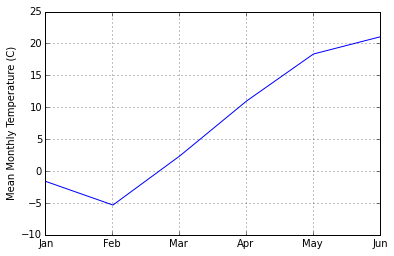

In [26]:
#readjust units into more common scale
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
nyc_scaled = nyc_agg['MNTM']/10
nyc_scaled.plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

Now try the time series for precipitation and at least two other variables. Then share some thoughts on how they compare. Is it easier to compare the data using tables or graphs?

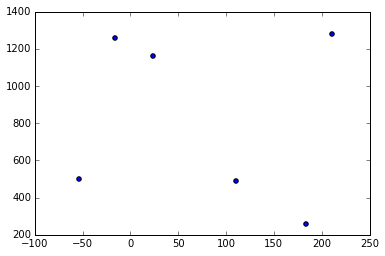

In [22]:
#Now how about comparing the precip to the temperature?

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc_agg['MNTM'],nyc_agg['TPCP'] )

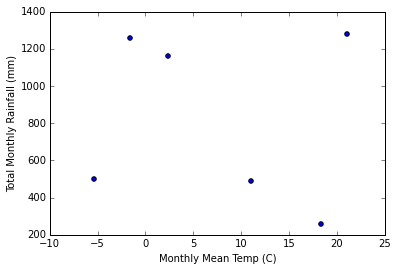

In [28]:
#what's missing? Is it clear what's happening above?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc_agg['MNTM']/10,nyc_agg['TPCP']) #rescale
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

Convert the units to Fahrenheit and inches-does the graph change? Does it make a difference in the interpretation? (Easier/harder/neither?)
Plot the scatters of: Max vs Min temp, Snow vs. Rain, ... any other combo from the dataset